
![](https://www.kaggle.com/static/images/site-logo.png)



The Titanic Survival Prediction project involves building a predictive model to determine whether a passenger would have survived the Titanic disaster based on various features like age, gender, ticket class, etc. The project includes stages such as data preprocessing, exploratory data analysis (EDA), feature engineering, and machine learning. Algorithms such as logistic regression, decision trees, or random forests are typically employed for prediction. The aim is to analyze the dataset, extract meaningful insights, engineer relevant features, and train a model that accurately predicts survival outcomes.








# Author by: Najeeb uallah
# Date: 2021-03-21
# **Project: Titanic Survival Prediction**


In [53]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels 

import warnings
warnings.filterwarnings('ignore')

# Load data set from pandas library

In [3]:
# load dataset 
df = pd.read_csv("tested.csv")


# **Data Exploration**
<hr> EDA (Exploratory Data Analysis) is a process where we tend to analyze the data and summarize the main characteristics of the data. It often employs data visualization methods to discover patterns and relationships in the data. In this section, we will perform the following operations:


### **1. Data Description:**
- **PassengerId:** Unique Id of a passenger. (int64)
- **Survived:** Whether the passenger survived or not. (int64)
    - 0 = Not survived
    - 1 = Survived
    - NaN = Unknown
    -  **Target Variable**
    -  
    -  


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.shape

(418, 12)

In [9]:
df.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

# **Impute Missing Values using mean method**

In [10]:

df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum().sort_values(ascending=False)


df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df.isnull().sum().sort_values(ascending=False)


Cabin          327
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [11]:
# drop cabin columns

df.drop(['Cabin'], axis=1, inplace=True)
df.isnull().sum().sort_values(ascending=False)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           170
Embarked         3
dtype: int64

In [13]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [14]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [16]:

df.groupby(['Pclass'])['Survived'].mean()


Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64

In [17]:
df['Age'].max()

76.0

In [18]:
df['Age'].min()

0.17

In [19]:
df['Age'].unique()

array([34.5       , 47.        , 62.        , 27.        , 22.        ,
       14.        , 30.        , 26.        , 18.        , 21.        ,
       30.27259036, 46.        , 23.        , 63.        , 24.        ,
       35.        , 45.        , 55.        ,  9.        , 48.        ,
       50.        , 22.5       , 41.        , 33.        , 18.5       ,
       25.        , 39.        , 60.        , 36.        , 20.        ,
       28.        , 10.        , 17.        , 32.        , 13.        ,
       31.        , 29.        , 28.5       , 32.5       ,  6.        ,
       67.        , 49.        ,  2.        , 76.        , 43.        ,
       16.        ,  1.        , 12.        , 42.        , 53.        ,
       26.5       , 40.        , 61.        , 60.5       ,  7.        ,
       15.        , 54.        , 64.        , 37.        , 34.        ,
       11.5       ,  8.        ,  0.33      , 38.        , 57.        ,
       40.5       ,  0.92      , 19.        , 36.5       ,  0.75

In [20]:
bins = [0,5,10,15,18,40,76]
labels = ["0-5","6-10","11-15","16-18","18-40","41-76"]
# add new column
df["age_group"] = pd.cut(df["Age"],bins= bins ,labels=labels)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,18-40
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,41-76
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,41-76
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,18-40
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,18-40


In [21]:
df['age_group'].value_counts()

age_group
18-40    287
41-76     77
16-18     22
0-5       12
6-10      10
11-15     10
Name: count, dtype: int64

# **Visualization**

`age_group`,~`survived`, barplot,

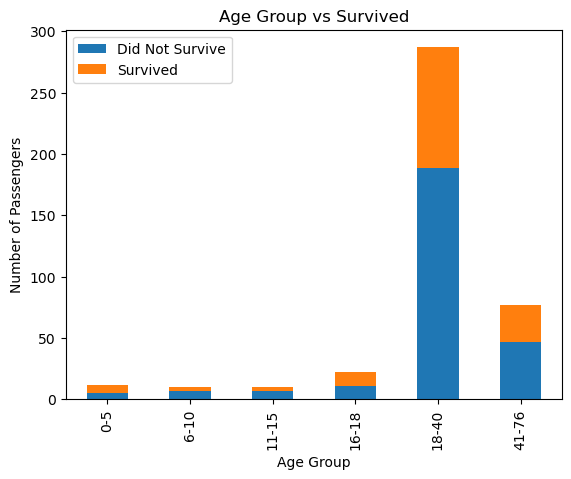

In [32]:
# age group vs survived
df.groupby("age_group")['Survived'].value_counts().unstack().plot(kind="bar",stacked=True)
plt.title('Age Group vs Survived')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

In [23]:
df.groupby("Sex")['age_group'].value_counts().unstack()

age_group,0-5,6-10,11-15,16-18,18-40,41-76
Sex,,,,,,
female,7,3,3,11,98,30
male,5,7,7,11,189,47


In [24]:
df.groupby("Sex")[['Survived',"Sex"]].value_counts().unstack()

Survived,0,1
Sex,,
female,NaN,152.0
male,266.0,NaN


In [25]:

df.groupby(["Pclass","Sex"])['Survived'].value_counts()


Pclass  Sex     Survived
1       female  1            50
        male    0            57
2       female  1            30
        male    0            63
3       female  1            72
        male    0           146
Name: count, dtype: int64

In [26]:
df.pivot_table(index='Pclass', columns='age_group', values='Survived')


age_group,0-5,6-10,11-15,16-18,18-40,41-76
Pclass,,,,,,
1,NaN,0.000000,0.00,0.666667,0.489796,0.45283
2,0.666667,0.500000,0.75,0.250000,0.312500,0.18750
3,0.555556,0.285714,0.00,0.533333,0.310345,0.37500


In [27]:
# survived  male and female from pclass 

df.groupby("Pclass")['Sex'].value_counts().unstack()


Sex,female,male
Pclass,,
1,50,57
2,30,63
3,72,146


# **Visualization**

`pclass`,~`sex`, barplot

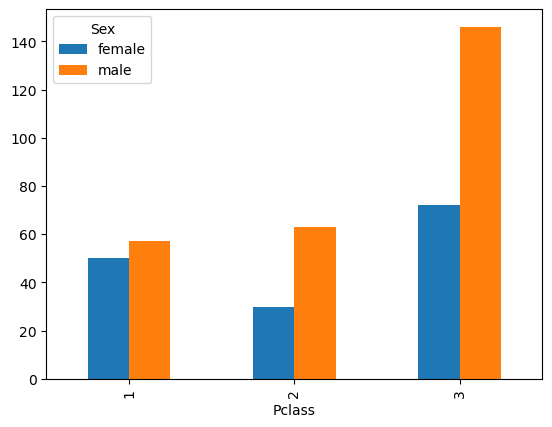

In [28]:

df.groupby ("Pclass")['Sex'].value_counts().unstack().plot(kind="bar")
plt.show()




In [29]:
df.groupby("Pclass")['Survived'].value_counts().unstack()

Survived,0,1
Pclass,,
1,57,50
2,63,30
3,146,72


In [35]:
corr = df[['Age',"Fare"]].corr()
corr

,Age,Fare
Age,1.0000,0.3268
Fare,0.3268,1.0000


<Axes: xlabel='Age', ylabel='Fare'>

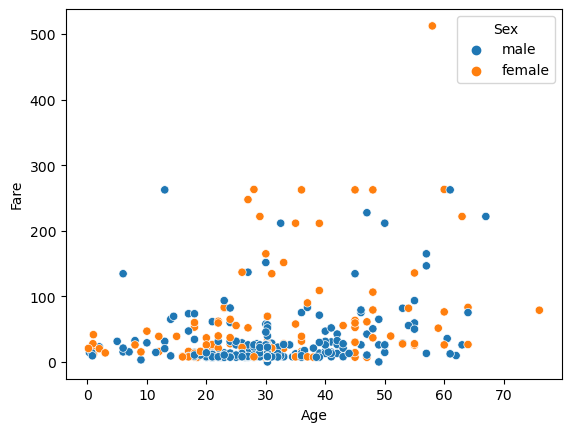

In [36]:
sns.scatterplot (data=df ,x= 'Age',y= 'Fare',hue="Sex")


<Axes: xlabel='Age', ylabel='Count'>

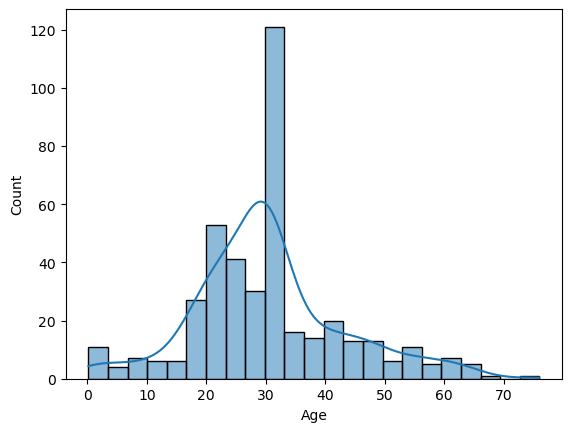

In [31]:
sns.histplot(df,x="Age",kde=True )

In [42]:
# boxplot using plotly 
import plotly.express as px
fig = px.box(df, x="Sex", y="Fare", color="Survived", notched=True)
fig.show()


In [52]:
import plotly.express as px

fig = px.scatter(df, x="Age", y="Fare", color="Survived", trendline="ols", title="Age vs Fare with stat model")
fig.show()


In [54]:
#hist plot using plotly 
fig = px.histogram(df, x="Fare", color="Survived", histnorm='percent', title="Fare vs Survived")
fig.show()

In [56]:
df["Ticket"].nunique()

363

In [58]:
print(f"{df.groupby('Ticket')['Survived'].sum().loc[df.groupby('Ticket')['Survived'].sum()==1].count()/df['Ticket'].nunique()*100:.2f}%")

34.99%


In [59]:
# how many pessenger who did not survive
print(f"{df.groupby('Ticket')['Survived'].sum().loc[df.groupby('Ticket')['Survived'].sum()==0].count()/df['Ticket'].nunique()*100:.2f}%") 

61.71%


In [63]:
# how many female pessenger who did not survive
print(f"{df.loc[(df['Sex']=='female') & (df['Survived']==1)]['Ticket'].nunique()/df['Ticket'].nunique()*100:.2f}%")


38.29%


In [65]:
print(f"{df.loc[(df['Sex']=='male') & (df['Survived']==0)]['Ticket'].nunique()/df['Ticket'].nunique()*100:.2f}%")


68.87%


In [69]:
# how many female pessenger who did not survive using plot
fig = px.histogram(df.loc[(df['Sex']=='female') & (df['Survived']==1)], x="Ticket", color="Survived", histnorm='percent', title="Female pessenger who did not survive")
fig.show()



In [73]:
fig = px.histogram(df.loc[(df['Sex']=='male') & (df['Survived']==0)], x="Ticket", color="Survived", histnorm='percent', title="Male pessenger who did not survive")
fig.show()


In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,18-40
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,41-76
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,41-76
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,18-40
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,18-40


In [78]:
# how many sibsp  who did not survive
print(f"{df.groupby('SibSp')['Survived'].sum().loc[df.groupby('SibSp')['Survived'].sum()==1].count()/df['SibSp'].nunique()*100:.2f}%")

57.14%


In [89]:
# how many sibsp  who did not survive using plot
fig = px.histogram(df.loc[(df['SibSp']>1) & (df['Survived']==1)], x="SibSp", color="Survived", histnorm='percent', 
title="SibSp who  survive")
fig.show()


In [84]:
# how many sibsp who survive with age_group 
fig = px.box(df.loc[(df['SibSp']>0) & (df['Survived']==1)], x="SibSp", y="Age", color="Survived", facet_row="Pclass", title="SibSp who  survive with age_droup")
fig.show()


In [88]:
# how many sibsp who survive with age_group 

fig = px.box(df.loc[(df['SibSp']>0) & (df['Survived']==1)], x="SibSp", y="Fare", color="Survived", facet_row="Pclass", title="SibSp who  survive with Fare")
fig.show()
